<a href="https://colab.research.google.com/github/AlexAlexeyuk/AlexAlexeyuk/blob/master/Alexeyuk_Spam_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Цель**: 
**Задачи**:
**Выводы**:

In [81]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

full_df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = full_df.iloc[:,:2]
df = df.rename(columns={"v1":"target", "v2":"text"})

In [82]:
df["text"] = df["text"].str.lower()
df.head()

,target,text
0,ham,"go until jurong point, crazy.. available only in bugis n great wor..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives around here though"


In [83]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,target,text,text_wo_punct
0,ham,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though


In [84]:
stopwords = "i, me, my, myself, we, our, ours, ourselves, you, you're, you've, \
you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, \
she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, \
themselves, what, which, who, whom, this, that, that'll, these, those, am, is,\
 are, was, were, be, been, being, have, has, had, having, do, does, did, doing,\
  a, an, the, and, but, if, or, because, as, until, while, of, at, by, for,\
   with, about, against, between, into, through, during, before, after, above,\
    below, to, from, up, down, in, out, on, off, over, under, again, further, \
    then, once, here, there, when, where, why, how, all, any, both, each, few,\
     more, most, other, some, such, no, nor, not, only, own, same, so, than, \
     too, very, s, t, can, will, just, don, don't, should, should've, now, d, \
     ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, \
     doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, \
     ma, mightn, mightn't, mustn, mustn't, needn, needn't, shan, shan't,\
      shouldn, shouldn't, wasn, wasn't, weren, weren't, won, won't, wouldn,\
       wouldn't"


In [85]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in \
                     stopwords])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text:\
                                               remove_stopwords(text))
df.head()

,target,text,text_wo_punct,text_wo_stop
0,ham,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say
4,ham,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though


In [86]:
df.groupby("target").describe()

text  ... text_wo_stop
       count  ...         freq
target        ...             
ham     4825  ...           30
spam     747  ...            4

[2 rows x 12 columns]

In [87]:
df['target'] = df['target'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head(15)

,target,text,text_wo_punct,text_wo_stop
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though
5,1,freemsg hey there darling it's been 3 week's now and no word back!...,freemsg hey there darling its been 3 weeks now and no word back id...,freemsg darling 3 weeks word back like fun still tb ok xxx std chg...
6,0,even my brother is not like to speak with me. they treat me like a...,even my brother is not like to speak with me they treat me like ai...,even brother like speak treat like aids patent
7,0,as per your request 'melle melle (oru minnaminunginte nurungu vett...,as per your request melle melle oru minnaminunginte nurungu vettam...,per request melle melle oru minnaminunginte nurungu vettam set cal...
8,1,winner!! as a valued network customer you have been selected to re...,winner as a valued network customer you have been selected to rece...,winner valued network customer selected receivea å£900 prize rewar...
9,1,had your mobile 11 months or more? u r entitled to update to the l...,had your mobile 11 months or more u r entitled to update to the la...,mobile 11 months entitled update latest colour mobiles camera free...


In [88]:
df['length'] = df['text_wo_stop'].apply(len)

In [89]:
df.head(10)

,target,text,text_wo_punct,text_wo_stop,length
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43
5,1,freemsg hey there darling it's been 3 week's now and no word back!...,freemsg hey there darling its been 3 weeks now and no word back id...,freemsg darling 3 weeks word back like fun still tb ok xxx std chg...,82
6,0,even my brother is not like to speak with me. they treat me like a...,even my brother is not like to speak with me they treat me like ai...,even brother like speak treat like aids patent,46
7,0,as per your request 'melle melle (oru minnaminunginte nurungu vett...,as per your request melle melle oru minnaminunginte nurungu vettam...,per request melle melle oru minnaminunginte nurungu vettam set cal...,113
8,1,winner!! as a valued network customer you have been selected to re...,winner as a valued network customer you have been selected to rece...,winner valued network customer selected receivea å£900 prize rewar...,122
9,1,had your mobile 11 months or more? u r entitled to update to the l...,had your mobile 11 months or more u r entitled to update to the la...,mobile 11 months entitled update latest colour mobiles camera free...,102


In [90]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('call', 576),
 ('2', 478),
 ('get', 386),
 ('4', 287),
 ('dont', 279),
 ('go', 278),
 ('ok', 277),
 ('ltgt', 276),
 ('free', 275),
 ('know', 257)]

In [91]:
from nltk.stem.porter import PorterStemmer

# Drop the two columns 
#df.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text_wo_stop"].apply(lambda text: stem_words(text))

df.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though


In [92]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [93]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))

df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [94]:

df.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [100]:
data = df.drop(['text', 'text_stemmed', 'text_wo_punct', 'text_wo_stop', 'length' ], axis = 1)
data.head()

,target,text_lemmatized
0,0,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar joking wif oni
2,1,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,dun say early hor already say
4,0,nah dont think go usf life around though


In [101]:
#!pip install h2o
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 12 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 16 days
H2O_cluster_name:,H2O_from_python_unknownUser_w7dd57
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.169 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [102]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OKMeansEstimator

In [103]:
def tokenize(sentences, stop_word = stopwords):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | \
                                         (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",\
                                          invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) |\
                                      (~ tokenized_words.isin(stopwords)),:]
    return tokenized_words

In [104]:
df = h2o.H2OFrame(data, column_names=['target', 'text_lemmatized'],
                    column_types=["enum", "string"])
                            

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [105]:
words = tokenize(df["text_lemmatized"])

In [106]:
words.head()


C1
go
jurong
point
crazy
available
bugis
great
world
la
buffet


In [107]:
# Train Word2Vec Model for vec size = 100
w2v_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v.hex")
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [108]:
# Sanity check - find synonyms for the word 'free'
w2v_model.find_synonyms("free", count = 5)

OrderedDict([('colour', 0.9256237745285034),
             ('camcorder', 0.9241380095481873),
             ('mobile', 0.9204438924789429),
             ('sub', 0.9161134362220764),
             ('unlimited', 0.9048953056335449)])

In [109]:
# Sanity check - find synonyms for the word 'hello'
w2v_model.find_synonyms("hello", count = 5)

OrderedDict([('real', 0.8125671148300171),
             ('name', 0.7484875321388245),
             ('slow', 0.7429438233375549),
             ('sound', 0.7421414256095886),
             ('girl', 0.7359306216239929)])

In [110]:
word_embeddings = w2v_model.to_frame()
word_embeddings.head()

Word,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
ray,-0.0625697,-0.195782,0.0709685,-0.0540985,0.00113798,-0.0349335,-0.0681423,-0.0626264,-0.0106018,-0.0288645,-0.122884,-0.0948337,0.0130581,-0.0171009,-0.0294913,0.0262519,-0.0451832,-0.037931,-0.0917065,0.00158664,-0.0154135,0.0385294,0.0497044,0.0491177,-0.0754209,0.105517,0.0361807,0.049617,0.0444039,-0.0367364,0.0507219,0.120606,0.00503434,-0.00479103,0.0990421,0.0190699,0.0205632,0.130203,0.103042,0.00118407,-0.111694,0.075798,0.0197769,-0.0197426,0.000843371,0.0154877,0.0717997,0.103611,-0.00721305,0.148773,-0.0174776,-0.0796228,0.0622517,0.080179,-0.0693179,0.0676043,0.0564792,-0.113279,-0.142332,0.0890644,-0.135843,-0.0105725,0.0468908,0.041012,-0.0793816,0.0691983,0.0792459,-0.0453882,0.0393607,-0.0412772,-0.0420949,-0.0158194,0.14994,0.001077,-0.0723799,-0.0895793,0.0711218,-0.10858,0.0427734,-0.09053,0.0020611,0.0125178,0.0364567,0.0439361,0.0329459,0.0230779,-0.0591947,-0.00330446,0.111258,-0.0142613,0.0505519,0.0600952,-0.0139021,0.0347933,0.0681334,0.116076,-0.042775,-0.0378474,-0.0561093,0.00405171
moral,-0.00873312,-0.173195,-0.0180287,0.089679,0.0117742,-0.0461834,0.0119213,-0.0460316,-0.0515949,-0.00647029,-0.0955705,0.00375311,0.0123537,-0.108942,-0.0310823,-0.0663351,-0.180694,0.0105167,-0.00785834,-0.00553231,0.0104812,-0.0709876,0.0213826,0.00312762,-0.0255069,0.0479372,-0.0182645,0.0239045,0.0257189,-0.0186643,0.0276947,0.0876221,0.045417,0.00841228,0.047748,-0.0954189,-0.0621447,0.162633,0.0106496,-0.0438538,-0.146765,0.00520001,0.0132071,0.0308379,-0.0256236,-0.00981922,0.133927,0.086661,-0.00303357,0.223326,0.0195369,-0.0138449,-0.0241217,-0.0104553,0.0347794,-0.0575035,0.183438,-0.0206418,0.017113,0.038486,-0.116572,-0.00451477,0.127924,0.133658,-0.0414337,-0.0395359,-0.165254,0.0152737,0.079748,0.0149421,-0.0294645,-0.0557045,0.0179877,0.0486572,-0.0536276,-0.0833269,0.0552484,-0.073324,-0.0289199,-0.0348732,0.00919059,0.0043845,0.0286842,-0.0618244,0.00592931,0.0800368,0.0169649,-0.0318224,0.0815566,0.0121684,0.0318885,-0.0976289,0.0256815,0.106113,0.0345705,0.011422,-0.0170553,0.0220074,0.00337356,-0.0853673
wet,0.0237216,-0.05476,-0.0690152,0.100548,-0.0769349,-0.0210652,-0.0435374,-0.0319069,-0.0939634,-0.0640357,-0.0351452,-0.178779,-0.0211914,0.0371309,0.0158282,0.00584903,-0.134532,0.0494382,-0.0095029,-0.0893866,-0.00189553,-0.015246,0.0947638,0.109642,0.0127918,0.0723235,-0.0778774,0.0273417,0.0204846,-0.0456144,0.058973,0.194052,0.000185032,0.0208639,-0.0808137,-0.0193062,-0.0451466,0.108554,0.1642,-0.0814336,-0.224431,0.0142723,0.0190682,-0.0160913,0.106536,0.0864808,0.143251,0.059331,0.0356582,0.133625,-0.0656401,-0.0306728,-0.00604103,-0.0138235,0.0397314,0.0261791,0.160009,-0.142754,0.0633004,-0.0340873,-0.182833,0.0832935,0.112641,-0.00103836,0.0227497,-0.0415496,-0.0223842,0.0980561,-0.0364183,0.0537794,-0.0592468,-0.0520699,-0.0511715,-0.0161665,-0.0324333,-0.0794518,0.100627,-0.044535,-0.00125113,-0.0240167,0.0270288,0.0778154,-0.0169786,-0.0935759,0.0565528,0.0197953,-0.0552645,0.0940706,0.0433827,0.00613235,-0.0263872,-0.071179,-0.0178665,0.0312717,0.0699819,0.110092,-0.0543694,-0.15194,-0.0262669,-0.0614589
art,-0.0107184,-0.0916466,-0.0250378,0.0795376,-0.0270083,-0.0513886,-0.00220804,-0.0119204,-0.060212,-0.0462371,-0.0216152,-0.0696029,0.00118204,-0.0182539,-0.0024722,-0.0589994,-0.0869982,0.0072792,-0.0426861,-0.0273616,0.0711869,-0.0137528,0.0435805,0.057498,-0.0117572,0.0749262,-0.00341998,0.0208266,0.00121803,-0.00649198,0.0166179,0.0979679,-0.0201824,0.0125883,0.00388912,-0.00930373,-0.0640437,0.155986,0.0812414,-0.0497992,-0.14272,0.0466847,0.00702036,-0.0228038,0.0169191,0.01

In [111]:

from h2o.estimators import H2OKMeansEstimator

kmeans = H2OKMeansEstimator(model_id = "word_segments.hex",
                            estimate_k = True, k = 2, # Max number of clusters
                            seed = 1234)

In [112]:
x = list(set(word_embeddings.col_names) - set(["Word"]))
kmeans.train(x = x, training_frame = word_embeddings)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [113]:
# Clusters
kmeans.centroid_stats()


Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,1158.0,62818.489352
1,,2.0,248.0,51640.674783


In [114]:
word_clusters = word_embeddings.cbind(kmeans.predict(word_embeddings))
word_clusters[["Word", "predict"]].head()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


Word,predict
ray,0
moral,0
wet,0
art,0
jazz,0
island,1
cartoon,0
bin,0
bar,0
plane,0


In [115]:
selected_words = ['2', 'get', 'ltgt',
 'ok',  'dont', 'go','know', 'got', 'like', 'call' ,'free', 'txt','mobile',
 'text', 'claim', 'stop', 'reply']
selected_clusters = word_clusters[word_clusters["Word"].isin(selected_words)]

In [116]:
print("Cluster 1")
print(selected_clusters[selected_clusters["predict"] == 0, "Word"])

Cluster 1


Word
like
ltgt
ok
dont
know
go
get


In [117]:
print("Cluster 2")
print(selected_clusters[selected_clusters["predict"] == 1, "Word"])

Cluster 2


Word
claim
mobile
reply
stop
txt
text
free
call


In [118]:
# Calculate a vector for each review
review_vecs = w2v_model.transform(words, aggregate_method = "AVERAGE")

In [119]:
review_vecs.dim

[5572, 100]

In [120]:
type(df)

h2o.frame.H2OFrame

In [121]:
# Add aggregated word embeddings 
ext_df = df.cbind(review_vecs)

In [127]:
train,test  = ext_df.split_frame(ratios=[.8])

In [128]:
train.dim

[4486, 102]

In [129]:
test.dim

[1086, 102]

In [130]:
from h2o.estimators import H2OGradientBoostingEstimator
predictors = review_vecs.names
response = 'target'

gbm_embeddings = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10,
                                              model_id = "gbm_embeddings.hex", ntrees = 1000,
                                             )
gbm_embeddings.train(x = predictors, y = response, 
                   training_frame = train, validation_frame = test
                  )

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [132]:
gbm_embeddings.auc

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_embeddings.hex


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,160.0,160.0,53459.0,5.0,5.0,5.0,11.0,30.0,21.86875




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0004979385700805463
RMSE: 0.02231453719171756
LogLoss: 0.004350731980235112
Mean Per-Class Error: 0.0015723270440251014
AUC: 0.9999612023196929
AUCPR: 0.9997837041687152
Gini: 0.9999224046393858

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8669098370934649: 


,,0,1,Error,Rate
0,0,3850.0,0.0,0.0,(0.0/3850.0)
1,1,2.0,634.0,0.0031,(2.0/636.0)
2,Total,3852.0,634.0,0.0004,(2.0/4486.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.866910,0.998425,174.0
1,max f2,0.866910,0.997483,174.0
2,max f0point5,0.866910,0.999369,174.0
3,max accuracy,0.866910,0.999554,174.0
4,max precision,0.999764,1.000000,0.0
5,max recall,0.027715,1.000000,187.0
6,max specificity,0.999764,1.000000,0.0
7,max absolute_mcc,0.866910,0.998167,174.0
8,max min_per_class_accuracy,0.866910,0.996855,174.0
9,max mean_per_class_accuracy,0.866910,0.998428,174.0



Gains/Lift Table: Avg response rate: 14.18 %, avg score: 14.18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010031,0.999586,7.053459,7.053459,1.000000,0.999688,1.000000,0.999688,0.070755,0.070755,605.345912,605.345912,0.070755
1,2,0.020508,0.999455,7.053459,7.053459,1.000000,0.999512,1.000000,0.999598,0.073899,0.144654,605.345912,605.345912,0.144654
2,3,0.030317,0.999257,7.053459,7.053459,1.000000,0.999356,1.000000,0.999520,0.069182,0.213836,605.345912,605.345912,0.213836
3,4,0.040125,0.999114,7.053459,7.053459,1.000000,0.999178,1.000000,0.999436,0.069182,0.283019,605.345912,605.345912,0.283019
4,5,0.050156,0.998929,7.053459,7.053459,1.000000,0.999005,1.000000,0.999350,0.070755,0.353774,605.345912,605.345912,0.353774
5,6,0.100089,0.995823,7.053459,7.053459,1.000000,0.997735,1.000000,0.998544,0.352201,0.705975,605.345912,605.345912,0.705975
6,7,0.160053,0.027715,4.903334,6.247911,0.695167,0.680077,0.885794,0.879230,0.294025,1.000000,390.333403,524.791086,0.978701
7,8,0.200178,0.005791,0.000000,4.995546,0.000000,0.012220,0.708241,0.705442,0.000000,1.000000,-100.000000,399.554566,0.931948
8,9,0.300045,0.001421,0.000000,3.332838,0.000000,0.002847,0.472511,0.471592,0.000000,1.000000,-100.000000,233.283804,0.815584
9,10,0.400134,0.000761,0.000000,2.499164,0.000000,0.001042,0.354318,0.353889,0.000000,1.000000,-100.000000,149.916435,0.698961




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.021614103265911126
RMSE: 0.14701735702260169
LogLoss: 0.08237547791050462
Mean Per-Class Error: 0.03094941094941095
AUC: 0.990986370986371
AUCPR: 0.9484525300673923
Gini: 0.981972741972742

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1854332337064718: 


,,0,1,Error,Rate
0,0,956.0,19.0,0.0195,(19.0/975.0)
1,1,6.0,105.0,0.0541,(6.0/111.0)
2,Total,962.0,124.0,0.023,(25.0/1086.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.185433,0.893617,104.0
1,max f2,0.185433,0.924296,104.0
2,max f0point5,0.977786,0.923567,70.0
3,max accuracy,0.185433,0.976980,104.0
4,max precision,0.999796,1.000000,0.0
5,max recall,0.000785,1.000000,295.0
6,max specificity,0.999796,1.000000,0.0
7,max absolute_mcc,0.185433,0.882453,104.0
8,max min_per_class_accuracy,0.035844,0.965128,121.0
9,max mean_per_class_accuracy,0.035844,0.969051,121.0



Gains/Lift Table: Avg response rate: 10.22 %, avg score: 10.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010129,0.999437,9.783784,9.783784,1.000000,0.999587,1.000000,0.999587,0.099099,0.099099,878.378378,878.378378,0.099099
1,2,0.020258,0.999309,9.783784,9.783784,1.000000,0.999379,1.000000,0.999483,0.099099,0.198198,878.378378,878.378378,0.198198
2,3,0.030387,0.999063,9.783784,9.783784,1.000000,0.999155,1.000000,0.999373,0.099099,0.297297,878.378378,878.378378,0.297297
3,4,0.040516,0.998449,8.894349,9.561425,0.909091,0.998746,0.977273,0.999216,0.090090,0.387387,789.434889,856.142506,0.386362
4,5,0.050645,0.997801,9.783784,9.605897,1.000000,0.998136,0.981818,0.999000,0.099099,0.486486,878.378378,860.589681,0.485461
5,6,0.100368,0.730971,7.428428,8.527151,0.759259,0.957281,0.871560,0.978332,0.369369,0.855856,642.842843,752.715100,0.841497
6,7,0.157459,0.027715,2.051439,6.179232,0.209677,0.144970,0.631579,0.676178,0.117117,0.972973,105.143854,517.923186,0.908358
7,8,0.200737,0.005278,0.000000,4.847012,0.000000,0.012508,0.495413,0.533093,0.000000,0.972973,-100.000000,384.701215,0.860152
8,9,0.300184,0.001297,0.181181,3.301277,0.018519,0.002657,0.337423,0.357366,0.018018,0.990991,-81.881882,230.127674,0.769453
9,10,0.400552,0.000681,0.089759,2.496552,0.009174,0.000939,0.255172,0.268054,0.009009,1.000000,-91.024052,149.655172,0.667692




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-14 11:36:52,0.136 sec,0.0,0.348819,0.408172,0.500000,0.141774,1.000000,0.858226,0.305497,0.336931,0.500000,0.102210,1.000000,0.897790
1,,2020-11-14 11:36:54,2.042 sec,10.0,0.171837,0.139416,0.991052,0.974397,7.053459,0.016496,0.173295,0.136454,0.988187,0.921817,9.783784,0.028545
2,,2020-11-14 11:36:55,3.043 sec,20.0,0.122504,0.081423,0.991506,0.978664,7.053459,0.012929,0.148498,0.094480,0.988298,0.930975,9.783784,0.027624
3,,2020-11-14 11:36:55,3.915 sec,30.0,0.105389,0.059624,0.992210,0.981784,7.053459,0.010031,0.144303,0.082157,0.987226,0.929512,9.783784,0.028545
4,,2020-11-14 11:36:56,4.654 sec,40.0,0.092839,0.046655,0.993997,0.985922,7.053459,0.007356,0.143245,0.077738,0.987193,0.930746,9.783784,0.026703
5,,2020-11-14 11:36:57,5.368 sec,50.0,0.081904,0.035285,0.998210,0.993500,7.053459,0.005796,0.142465,0.075515,0.987591,0.931626,9.783784,0.025783
6,,2020-11-14 11:36:58,6.010 sec,60.0,0.070560,0.026798,0.999476,0.997671,7.053459,0.003344,0.142931,0.075001,0.988810,0.933327,9.783784,0.025783
7,,2020-11-14 11:36:58,6.630 sec,70.0,0.059816,0.020959,0.999715,0.998789,7.053459,0.002006,0.141744,0.073730,0.989517,0.931973,9.783784,0.024862
8,,2020-11-14 11:36:59,7.273 sec,80.0,0.049140,0.016260,0.999786,0.999080,7.053459,0.000669,0.141309,0.072402,0.990349,0.940735,9.783784,0.023941
9,,2020-11-14 11:36:59,7.838 sec,90.0,0.041137,0.012983,0.999827,0.999216,7.053459,0.000446,0.141791,0.072995,0.990303,0.941075,9.783784,0.025783



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C59,1248.103882,1.000000,0.491114
1,C42,429.550629,0.344163,0.169023
2,C87,86.424767,0.069245,0.034007
3,C63,69.155380,0.055408,0.027212
4,C27,66.682999,0.053427,0.026239
5,C86,45.154140,0.036178,0.017768
6,C73,43.542881,0.034887,0.017134
7,C68,29.019753,0.023251,0.011419
8,C67,24.085209,0.019297,0.009477
9,C19,22.170961,0.017764,0.008724



See the whole table with table.as_data_frame()


<bound method ModelBase.auc of >

In [133]:
gbm_embeddings.confusion_matrix(valid = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1854332337064718: 


,,0,1,Error,Rate
0,0,956.0,19.0,0.0195,(19.0/975.0)
1,1,6.0,105.0,0.0541,(6.0/111.0)
2,Total,962.0,124.0,0.023,(25.0/1086.0)


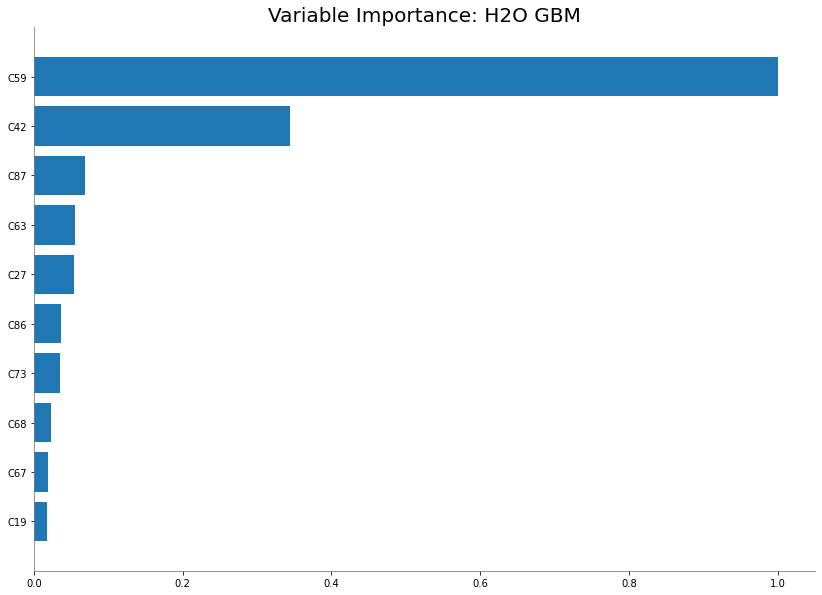

In [134]:
gbm_embeddings.varimp_plot()

In [135]:
top_w2v_features = list(filter(lambda x: x.startswith('C'), map(lambda x: x[0], gbm_embeddings.varimp())))[1:10]
top_w2v_features

['C42', 'C87', 'C63', 'C27', 'C86', 'C73', 'C68', 'C67', 'C19']

In [136]:
from h2o.estimators import H2OGeneralizedLinearEstimator

glm_predictors =  review_vecs.names

glm_embeddings = H2OGeneralizedLinearEstimator(model_id = "glm_embeddings.hex", interactions = top_w2v_features,
                                               family = "binomial"
                                              )
glm_embeddings.train(x = glm_predictors, y = response,
                     training_frame = train, validation_frame = test
                    )

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [137]:
print(glm_embeddings.auc)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_embeddings.hex


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 5.36E-4 )",136,88,6,py_63_sid_b057




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.02701403350609823
RMSE: 0.16435946430339274
LogLoss: 0.09974009539082002
Null degrees of freedom: 4485
Residual degrees of freedom: 4397
Null deviance: 3662.114905060337
Residual deviance: 894.8681358464372
AIC: 1072.8681358464373
AUC: 0.982352568814833
AUCPR: 0.9417099984428405
Gini: 0.964705137629666

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5953102469251481: 


,,0,1,Error,Rate
0,0,3811.0,39.0,0.0101,(39.0/3850.0)
1,1,106.0,530.0,0.1667,(106.0/636.0)
2,Total,3917.0,569.0,0.0323,(145.0/4486.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.595310,0.879668,148.0
1,max f2,0.189467,0.892857,240.0
2,max f0point5,0.730234,0.910985,113.0
3,max accuracy,0.595310,0.967677,148.0
4,max precision,0.999574,1.000000,0.0
5,max recall,0.000371,1.000000,397.0
6,max specificity,0.999574,1.000000,0.0
7,max absolute_mcc,0.595310,0.862846,148.0
8,max min_per_class_accuracy,0.133009,0.941299,262.0
9,max mean_per_class_accuracy,0.131774,0.942744,263.0



Gains/Lift Table: Avg response rate: 14.18 %, avg score: 14.18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010031,9.966518e-01,7.053459,7.053459,1.000000,0.998311,1.000000,0.998311,0.070755,0.070755,605.345912,605.345912,0.070755
1,2,0.020062,9.896541e-01,7.053459,7.053459,1.000000,0.993066,1.000000,0.995688,0.070755,0.141509,605.345912,605.345912,0.141509
2,3,0.030317,9.846747e-01,7.053459,7.053459,1.000000,0.987122,1.000000,0.992791,0.072327,0.213836,605.345912,605.345912,0.213836
3,4,0.041462,9.741404e-01,7.053459,7.053459,1.000000,0.978911,1.000000,0.989060,0.078616,0.292453,605.345912,605.345912,0.292453
4,5,0.050156,9.650887e-01,7.053459,7.053459,1.000000,0.969524,1.000000,0.985674,0.061321,0.353774,605.345912,605.345912,0.353774
5,6,0.100089,8.330913e-01,6.675595,6.864948,0.946429,0.915953,0.973274,0.950891,0.333333,0.687107,567.559524,586.494796,0.683990
6,7,0.150022,3.211129e-01,3.967571,5.900591,0.562500,0.590106,0.836553,0.830808,0.198113,0.885220,296.757075,490.059062,0.856649
7,8,0.200178,9.648201e-02,1.442041,4.783471,0.204444,0.174594,0.678174,0.666389,0.072327,0.957547,44.204053,378.347061,0.882482
8,9,0.300045,2.443572e-02,0.157443,3.243753,0.022321,0.048544,0.459881,0.460747,0.015723,0.973270,-84.255672,224.375275,0.784439
9,10,0.400134,1.157930e-02,0.125674,2.463799,0.017817,0.016716,0.349304,0.349677,0.012579,0.985849,-87.432590,146.379881,0.682472




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.026744970490774303
RMSE: 0.16353889595681603
LogLoss: 0.09556519513554863
Null degrees of freedom: 1085
Residual degrees of freedom: 997
Null deviance: 731.8131908930116
Residual deviance: 207.56760383441159
AIC: 385.56760383441156
AUC: 0.9844213444213444
AUCPR: 0.8774146061853877
Gini: 0.9688426888426889

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24622340405376444: 


,,0,1,Error,Rate
0,0,940.0,35.0,0.0359,(35.0/975.0)
1,1,7.0,104.0,0.0631,(7.0/111.0)
2,Total,947.0,139.0,0.0387,(42.0/1086.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.246223,0.832000,119.0
1,max f2,0.246223,0.891938,119.0
2,max f0point5,0.740954,0.859873,74.0
3,max accuracy,0.553146,0.965930,88.0
4,max precision,0.999561,1.000000,0.0
5,max recall,0.007919,1.000000,319.0
6,max specificity,0.999561,1.000000,0.0
7,max absolute_mcc,0.246223,0.817006,119.0
8,max min_per_class_accuracy,0.147141,0.945946,133.0
9,max mean_per_class_accuracy,0.102078,0.953153,151.0



Gains/Lift Table: Avg response rate: 10.22 %, avg score: 11.25 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010129,9.889416e-01,8.894349,8.894349,0.909091,0.994992,0.909091,0.994992,0.090090,0.090090,789.434889,789.434889,0.089064
1,2,0.020258,9.820565e-01,8.894349,8.894349,0.909091,0.985952,0.909091,0.990472,0.090090,0.180180,789.434889,789.434889,0.178129
2,3,0.030387,9.755110e-01,9.783784,9.190827,1.000000,0.979479,0.939394,0.986808,0.099099,0.279279,878.378378,819.082719,0.277228
3,4,0.040516,9.681195e-01,8.894349,9.116708,0.909091,0.972431,0.931818,0.983214,0.090090,0.369369,789.434889,811.670762,0.366292
4,5,0.050645,9.531714e-01,9.783784,9.250123,1.000000,0.959163,0.945455,0.978404,0.099099,0.468468,878.378378,825.012285,0.465392
5,6,0.100368,4.772948e-01,6.703704,7.988594,0.685185,0.791898,0.816514,0.886006,0.333333,0.801802,570.370370,698.859410,0.781289
6,7,0.150092,1.224078e-01,2.898899,6.302437,0.296296,0.269644,0.644172,0.681813,0.144144,0.945946,189.889890,530.243741,0.886459
7,8,0.200737,4.935745e-02,0.533661,4.847012,0.054545,0.079551,0.495413,0.529866,0.027027,0.972973,-46.633907,384.701215,0.860152
8,9,0.300184,1.903595e-02,0.181181,3.301277,0.018519,0.031271,0.337423,0.364687,0.018018,0.990991,-81.881882,230.127674,0.769453
9,10,0.406998,1.109180e-02,0.000000,2.434878,0.000000,0.013579,0.248869,0.272541,0.000000,0.990991,-100.000000,143.487832,0.650478




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-14 11:46:26,0.000 sec,0,1831.057453,0.408172,,,,,,,,,,,,,,
1,,2020-11-14 11:46:27,0.708 sec,1,652.041494,0.150557,,,,,,,,,,,,,,
2,,2020-11-14 11:46:27,0.855 sec,2,511.344375,0.120750,,,,,,,,,,,,,,
3,,2020-11-14 11:46:27,0.990 sec,3,465.568210,0.111720,,,,,,,,,,,,,,
4,,2020-11-14 11:46:27,1.128 sec,4,450.723141,0.109042,,,,,,,,,,,,,,
5,,2020-11-14 11:46:28,1.292 sec,5,446.964456,0.108525,,,,,,,,,,,,,,
6,,2020-11-14 11:46:28,1.387 sec,6,447.434068,0.108523,0.164359,0.0997401,0.777981,NaN,NaN,7.05346,0.0323228,0.163539,0.0955652,0.708543,0.984421,0.877415,8.89435,0.038674


<bound method ModelBase.auc of >


In [138]:
glm_embeddings.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24622340405376444: 


,,0,1,Error,Rate
0,0,940.0,35.0,0.0359,(35.0/975.0)
1,1,7.0,104.0,0.0631,(7.0/111.0)
2,Total,947.0,139.0,0.0387,(42.0/1086.0)


In [139]:
from h2o.automl import H2OAutoML

automl = H2OAutoML(project_name = 'text_lemmatized', max_runtime_secs = 180, 
                   keep_cross_validation_models = False, keep_cross_validation_predictions = False,
                   nfolds = 3, exclude_algos = ["DRF"], seed = 1234)
automl.train(x = predictors, y = response, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [140]:
automl.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201114_115004,0.991924,0.0780316,0.949686,0.0527374,0.138883,0.0192884
StackedEnsemble_AllModels_AutoML_20201114_115004,0.99131,0.0816326,0.951083,0.0572419,0.1436,0.0206211
XGBoost_grid__1_AutoML_20201114_115004_model_3,0.990409,0.0702217,0.952388,0.0557034,0.138428,0.0191624
XGBoost_grid__1_AutoML_20201114_115004_model_5,0.989619,0.078351,0.937056,0.0677893,0.149222,0.0222673
XGBoost_grid__1_AutoML_20201114_115004_model_4,0.989152,0.0855027,0.946445,0.0372834,0.148931,0.0221805
DeepLearning_1_AutoML_20201114_115004,0.98802,0.0858935,0.913407,0.0458905,0.156787,0.0245821
GBM_2_AutoML_20201114_115004,0.98784,0.142026,0.936839,0.059806,0.176957,0.0313138
XGBoost_grid__1_AutoML_20201114_115004_model_2,0.987568,0.0854513,0.918583,0.0882606,0.154077,0.0237397
XGBoost_grid__1_AutoML_20201114_115004_model_1,0.987156,0.082085,0.929476,0.071781,0.153567,0.0235829
GBM_grid__1_AutoML_20201114_115004_model_2,0.986713,0.0800844,0.938841,0.0747471,0.149168,0.0222512


In [141]:
h2o.cluster().shutdown()

H2O session _sid_b057 closed.
